# Ejecución de cálculos TranSiesta y TBTrans

Antes de comenzar con el análisis de datos, necesitamos ejecutar los cálculos de TranSiesta y TBTrans. Este notebook guía paso a paso la ejecución de estos scripts y el posterior análisis de resultados.

## Paso 1: Ejecución de TranSiesta

El script `transiesta.sh` realiza los cálculos de TranSiesta para diferentes valores de bias. Ejecutaremos este script primero, ya que TBTrans necesita los resultados que genera TranSiesta.

Parámetros principales:
- `input_fdf_file`: Archivo de entrada con la configuración para TranSiesta
- `pseudo_dir`: Directorio con los pseudopotenciales
- `num_steps`: Número de pasos de bias a calcular
- `max_bias` (opcional): Valor máximo del bias (por defecto: 1.0)

### Ejemplo de uso:

In [2]:
# Ejemplo de ejecución de transiesta.sh
# Descomenta y modifica según tus necesidades

!bash ./transiesta.sh RUN.fdf ./ 5 1.0

# Parámetros utilizados:
# - RUN.fdf: Archivo con la configuración para TranSiesta
# - ./pseudo: Directorio con los pseudopotenciales
# - 5: Número de puntos de bias (incluyendo 0)
# - 1.0: Valor máximo del bias (opcional, por defecto es 1.0)
#
# Esto calculará: 0, 0.25, 0.5, 0.75, 1.0

Generated bias values: 0 .25 .5 .75 1
Created base directory: /home/artur/graphene/TranSiesta/TS_calculations_20250619_1522
Copied /home/artur/graphene/TranSiesta/RUN.fdf to /home/artur/graphene/TranSiesta/TS_calculations_20250619_1522/
Processing bias: 0 eV (1/5)
Created directory: /home/artur/graphene/TranSiesta/TS_calculations_20250619_1522/bias_0
Copying pseudopotentials from /home/artur/graphene/TranSiesta to /home/artur/graphene/TranSiesta/TS_calculations_20250619_1522/bias_0
Changed directory to: /home/artur/graphene/TranSiesta/TS_calculations_20250619_1522/bias_0
Running TranSiesta with bias 0 eV
Job completed
Time Summary:
  Elapsed time: 00:01:46
  Average time per calculation: 00:01:46
  Estimated remaining time: 00:07:04
  Estimated total time: 00:08:50
  Progress: 1/5 (20%)
Time for this calculation: 00:01:46
Calculation for bias 0 eV completed successfully.

Processing bias: .25 eV (2/5)
Created directory: /home/artur/graphene/TranSiesta/TS_calculations_20250619_1522/bias

## Paso 2: Ejecución de TBTrans

Una vez que TranSiesta ha completado los cálculos y generado los archivos TSHS, podemos ejecutar TBTrans para calcular las propiedades de transporte. El script `tbtrans.sh` automatiza este proceso.

Parámetros principales:
- `input_fdf_file`: Archivo de entrada con la configuración para TBTrans
- `num_steps`: Número de pasos de bias calculados en TranSiesta
- `max_bias` (opcional): Valor máximo del bias (por defecto: 1.0)

### Ejemplo de uso:

In [3]:
# Ejemplo de ejecución de tbtrans.sh
# Descomenta y modifica según tus necesidades

!bash ./tbtrans.sh RUN.fdf 5 1.0

# Parámetros utilizados:
# - TBT.fdf: Archivo con la configuración para TBTrans
# - 5: Número de puntos de bias (incluyendo 0)
# - 1.0: Valor máximo del bias (opcional, por defecto es 1.0)
#
# Esto procesará los mismos valores de bias que se calcularon en TranSiesta

Generated bias values: 0.0 0.2 0.5 0.8 1.0
Created base directory: /home/artur/graphene/TranSiesta/TBT_calculations_20250619_1526
Copied /home/artur/graphene/TranSiesta/RUN.fdf to /home/artur/graphene/TranSiesta/TBT_calculations_20250619_1526/
Processing bias: 0.0 eV (1/5)
Created directory: /home/artur/graphene/TranSiesta/TBT_calculations_20250619_1526/bias_0.0
Changed directory to: /home/artur/graphene/TranSiesta/TBT_calculations_20250619_1526/bias_0.0
Running tbtrans with bias 0.0 eV
ERROR: Could not read ../../TSHS_files/0.TSHS.
Stopping Program from Node:    0
--------------------------------------------------------------------------
MPI_ABORT was invoked on rank 0 in communicator MPI_COMM_WORLD
with errorcode 1.

NOTE: invoking MPI_ABORT causes Open MPI to kill all MPI processes.
You may or may not see output from other processes, depending on
exactly when Open MPI kills them.
--------------------------------------------------------------------------
Error: tbtrans calculation fa

## Paso 3: Verificación de resultados

Antes de proceder con el análisis, es importante verificar que los cálculos se hayan completado correctamente y que los archivos de resultados estén disponibles en las ubicaciones esperadas.

### Comprobación de archivos TSHS

In [4]:
import os
import glob

# Verificar archivos TSHS
tshs_dir = './TSHS_files/'
if os.path.exists(tshs_dir):
    tshs_files = glob.glob(os.path.join(tshs_dir, '*.TSHS'))
    print(f"Archivos TSHS encontrados ({len(tshs_files)}):")
    for f in sorted(tshs_files):
        print(f"  - {os.path.basename(f)}")
else:
    print(f"¡ADVERTENCIA! El directorio {tshs_dir} no existe.")
    print("Ejecuta primero el script transiesta.sh")

Archivos TSHS encontrados (0):


### Comprobación de archivos TBT

In [13]:
# Verificar archivos TBT
tbt_dir = './TBT_results/'
if os.path.exists(tbt_dir):
    tbt_files = glob.glob(os.path.join(tbt_dir, '*.nc'))
    print(f"Archivos TBT encontrados ({len(tbt_files)}):")
    for f in sorted(tbt_files):
        print(f"  - {os.path.basename(f)}")
else:
    print(f"¡ADVERTENCIA! El directorio {tbt_dir} no existe.")
    print("Ejecuta primero el script tbtrans.sh")

Archivos TBT encontrados (10):
  - 0.0_TS_prueba.TBT.nc
  - 0.1_TS_prueba.TBT.nc
  - 0.2_TS_prueba.TBT.nc
  - 0.3_TS_prueba.TBT.nc
  - 0.4_TS_prueba.TBT.nc
  - 0.6_TS_prueba.TBT.nc
  - 0.7_TS_prueba.TBT.nc
  - 0.8_TS_prueba.TBT.nc
  - 0.9_TS_prueba.TBT.nc
  - 1.0_TS_prueba.TBT.nc


## Paso 4: Detectar automáticamente los archivos disponibles

Antes de analizar los resultados, vamos a detectar automáticamente qué archivos están disponibles y extraer los valores de bias correspondientes. Esto nos permitirá trabajar con cualquier conjunto de resultados sin tener que modificar manualmente el código.

In [7]:
import re

def extract_bias_from_filename(filename):
    """Extrae el valor de bias del nombre del archivo."""
    # Intenta extraer el valor numérico del nombre del archivo
    match = re.search(r'(\d+\.\d+|\d+)', os.path.basename(filename))
    if match:
        return float(match.group(1))
    return None

# Función para encontrar y ordenar archivos TBT por valor de bias
def find_tbt_files(directory='./TBT_results/'):
    """Encuentra y ordena archivos TBT por valor de bias."""
    if not os.path.exists(directory):
        print(f"El directorio {directory} no existe")
        return []
    
    # Buscar todos los archivos .nc en el directorio
    tbt_files = glob.glob(os.path.join(directory, '*.nc'))
    
    # Crear una lista de tuplas (valor_bias, ruta_archivo)
    files_with_bias = []
    for file in tbt_files:
        bias = extract_bias_from_filename(file)
        if bias is not None:
            files_with_bias.append((bias, file))
    
    # Ordenar por valor de bias
    files_with_bias.sort()
    
    return files_with_bias

# Encontrar archivos TBT y sus valores de bias
tbt_files_with_bias = find_tbt_files()

if tbt_files_with_bias:
    print(f"Encontrados {len(tbt_files_with_bias)} archivos TBT ordenados por bias:")
    for bias, file in tbt_files_with_bias:
        print(f"  - Bias: {bias:.2f} V -> {os.path.basename(file)}")
    
    # Extraer los valores de bias para usarlos en el análisis
    bias_values = [bias for bias, _ in tbt_files_with_bias]
    print(f"\nValores de bias disponibles: {bias_values}")
else:
    print("No se encontraron archivos TBT. Ejecute el script tbtrans.sh primero.")

Encontrados 10 archivos TBT ordenados por bias:
  - Bias: 0.00 V -> 0.0_TS_prueba.TBT.nc
  - Bias: 0.10 V -> 0.1_TS_prueba.TBT.nc
  - Bias: 0.20 V -> 0.2_TS_prueba.TBT.nc
  - Bias: 0.30 V -> 0.3_TS_prueba.TBT.nc
  - Bias: 0.40 V -> 0.4_TS_prueba.TBT.nc
  - Bias: 0.60 V -> 0.6_TS_prueba.TBT.nc
  - Bias: 0.70 V -> 0.7_TS_prueba.TBT.nc
  - Bias: 0.80 V -> 0.8_TS_prueba.TBT.nc
  - Bias: 0.90 V -> 0.9_TS_prueba.TBT.nc
  - Bias: 1.00 V -> 1.0_TS_prueba.TBT.nc

Valores de bias disponibles: [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]


## Paso 5: Análisis de la curva I-V

Una vez que tenemos los archivos TBT, podemos calcular la corriente eléctrica para cada valor de bias y generar la curva característica I-V. Utilizaremos la biblioteca `sisl` para leer los archivos NetCDF y extraer la información de la corriente.

Calculando corriente para cada valor de bias...
Bias 0.00 V: Corriente = 0.000000 µA
Bias 0.10 V: Corriente = 0.000229 µA
Bias 0.20 V: Corriente = 0.007792 µA
Bias 0.30 V: Corriente = 0.065709 µA
Bias 0.40 V: Corriente = 0.173100 µA
Bias 0.60 V: Corriente = 3.342843 µA
Bias 0.70 V: Corriente = 8.574493 µA
Bias 0.80 V: Corriente = 14.987363 µA
Bias 0.40 V: Corriente = 0.173100 µA
Bias 0.60 V: Corriente = 3.342843 µA
Bias 0.70 V: Corriente = 8.574493 µA
Bias 0.80 V: Corriente = 14.987363 µA
Bias 0.90 V: Corriente = 22.066479 µA
Bias 1.00 V: Corriente = 29.549849 µA
Bias 0.90 V: Corriente = 22.066479 µA
Bias 1.00 V: Corriente = 29.549849 µA


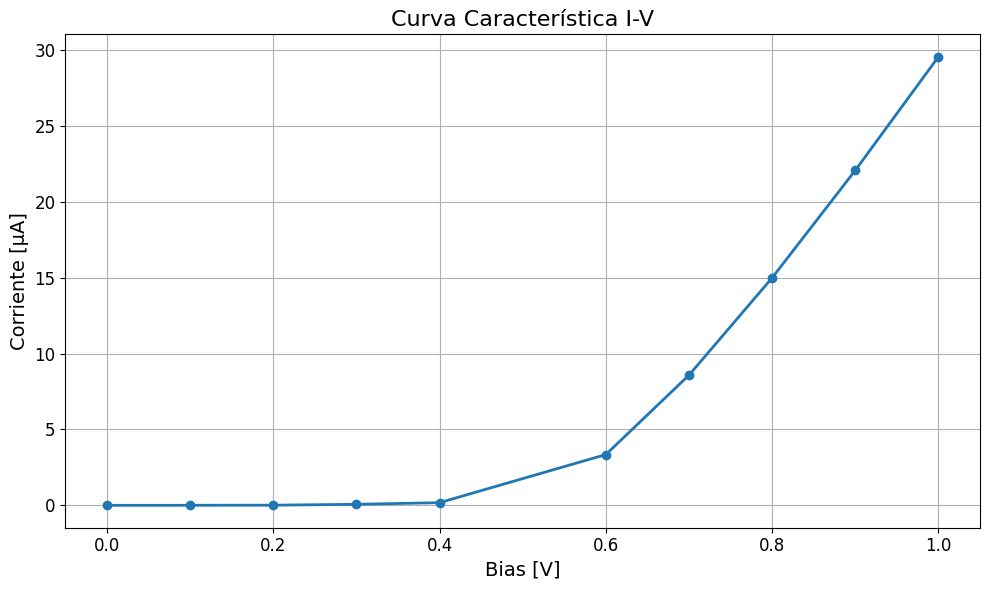

In [8]:
# Importamos las bibliotecas necesarias si aún no están importadas
import sisl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Función para calcular la corriente a partir de los archivos TBT
def calculate_current_from_tbt_files(tbt_files_with_bias):
    """Calcula la corriente para cada valor de bias usando archivos TBT."""
    bias_values = []
    current_values = []
    
    for bias, file_path in tbt_files_with_bias:
        try:
            # Intenta leer el archivo y extraer la corriente
            tbt_file = sisl.get_sile(file_path)
            current = tbt_file.current()
            
            bias_values.append(bias)
            current_values.append(current)
            print(f"Bias {bias:.2f} V: Corriente = {current*1e6:.6f} µA")
        except Exception as e:
            print(f"Error al procesar el archivo {os.path.basename(file_path)}: {str(e)}")
    
    return np.array(bias_values), np.array(current_values)

# Calcular la corriente si hay archivos TBT disponibles
if tbt_files_with_bias:
    print("Calculando corriente para cada valor de bias...")
    bias_array, current_array = calculate_current_from_tbt_files(tbt_files_with_bias)
    
    # Graficar la curva I-V
    plt.figure(figsize=(10, 6))
    plt.plot(bias_array, current_array * 1e6, 'o-', linewidth=2)
    plt.grid(True)
    plt.xlabel('Bias [V]', fontsize=14)
    plt.ylabel('Corriente [µA]', fontsize=14)
    plt.title('Curva Característica I-V', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No se pueden calcular las corrientes sin archivos TBT.")